In [1]:
import pandas as pd

In [2]:
import glob

In [56]:
def no_sparse(df, th = .99, Geo_cat = ['BRA ID ST']):
    cat_size = df.reset_index().groupby('node_name').sum()[['value_USD']].sort_values(by = 'value_USD', ascending = False)
    cat_cumsum = (cat_size/cat_size.sum()).cumsum()
    l = list(cat_cumsum.loc[cat_cumsum['value_USD'] < th].index)   
    df = df.loc[df.reset_index().node_name.isin(l)].set_index([Geo_cat[0], 'node_name'])
    
    nodes_df = df.reset_index()[['node_name', 'node_value_USD', 'att_A']].drop_duplicates().reset_index(drop = True)

    return nodes_df

In [20]:
len(node_ct.T)

36

In [121]:
files = []
for name in glob.glob('data/node_refs/*ST*w_nodes.csv*'):
        files += [name]
# print len(files)
# files

nd_df_list = [pd.read_csv(f) for f in files]

node_ct = pd.DataFrame([])

for nd_df in nd_df_list:

    w = len(nd_df.loc[nd_df.node_name.str.contains('Wages')])
    o = len(nd_df.loc[nd_df.node_name.str.contains('Output')])
    x = len(nd_df.loc[nd_df.node_name.str.contains('Exports')])
    m = len(nd_df.loc[nd_df.node_name.str.contains('Imports')])
    t = len(nd_df)
    
    node_ct = pd.concat([node_ct,pd.DataFrame([w, o, x, m, t])], axis = 1)
    
node_ct.index = ['Wages', 'Output', 'Exports', 'Imports', 'Total']
node_ct.columns = files
df1 = node_ct.T.sort_values(by = 'Total')

df1['Balance'] = (100*(df1['Wages'] + df1['Output']) / df1['Total']).round().astype(int)
# (df['Exports'] + df['Imports'])

df_node_ct = df1.loc[abs(df1.Balance - 45) < 20]

# print df_node_ct.to_latex()
list(df_node_ct.index)

['data/node_refs/BRA_ ST_GG_0_1_1_w_nodes.csv',
 'data/node_refs/BRA_ ST_GG_0_1_2_w_nodes.csv',
 'data/node_refs/BRA_ ST_GG_0_2_1_w_nodes.csv',
 'data/node_refs/BRA_ ST_0_S_1_1_w_nodes.csv',
 'data/node_refs/BRA_ ST_0_S_1_2_w_nodes.csv',
 'data/node_refs/BRA_ ST_0_S_2_1_w_nodes.csv',
 'data/node_refs/BRA_ ST_0_S_2_2_w_nodes.csv',
 'data/node_refs/BRA_ ST_SGP_0_1_2_w_nodes.csv',
 'data/node_refs/BRA_ ST_SGP_0_2_1_w_nodes.csv',
 'data/node_refs/BRA_ ST_SGP_0_2_2_w_nodes.csv',
 'data/node_refs/BRA_ ST_SG_0_4_2_w_nodes.csv',
 'data/node_refs/BRA_ ST_SG_0_2_4_w_nodes.csv',
 'data/node_refs/BRA_ ST_0_G_2_4_w_nodes.csv',
 'data/node_refs/BRA_ ST_SG_0_4_4_w_nodes.csv',
 'data/node_refs/BRA_ ST_0_G_4_4_w_nodes.csv',
 'data/node_refs/BRA_ ST_SGP_S_4_4_w_nodes.csv',
 'data/node_refs/BRA_ ST_GG_D_4_4_w_nodes.csv']

In [ ]:
# BRA ID ST      27
# BRA ID MER    126
# BRA ID MIR    400

In [118]:
files = []
for name in glob.glob('data/node_refs/*ST*w_concat_data.csv*'):
        files += [name]


concat_df_list = [pd.read_csv(f) for f in files]

node_ct = pd.DataFrame([])

for df in concat_df_list:

    _1 = len(no_sparse(df, .9))
    _2 = len(no_sparse(df, .99))
    _3 = len(no_sparse(df, .999))
    _4 = len(no_sparse(df, .9999))
    _5 = df.node_name.nunique()
    
    t = len(nd_df)
    
    node_ct = pd.concat([node_ct,pd.DataFrame([_1, _2, _3, _4, _5])], axis = 1)
    
node_ct.index = ['90%', '99%', '99.9%', '99.99%', 'Max']
node_ct.columns = files
df = node_ct.T
node_ct_th = df.reindex_axis(df.mean(axis = 1).sort_values().index)

# node_ct_th


/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


In [119]:
# node_ct_th.style.apply(highlight)

import numpy as np

df = node_ct_th
def highlight(s, color = '#5499c7', lev = 100, band = 50):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = abs(s - lev) < band
    return ['background-color: '+color if v else '' for v in is_max]
df.index = [s[15:] for s in  list(df.index)]

df.style.apply(highlight, color = '#e6b0aa', lev = 27, band = 30).apply(highlight, color = '#5499c7', lev = 126, band = 40).apply(highlight, color = '#abebc6', lev = 400, band = 200)


,90%,99%,99.9%,99.99%,Max
BRA_ ST_GG_0_1_1_w_concat_data.csv,6,22,37,44,48
BRA_ ST_0_S_1_1_w_concat_data.csv,14,32,47,54,59
BRA_ ST_SGP_0_1_1_w_concat_data.csv,24,51,69,76,81
BRA_ ST_GG_0_2_1_w_concat_data.csv,6,32,69,91,115
BRA_ ST_GG_0_1_2_w_concat_data.csv,6,29,74,97,115
BRA_ ST_0_S_2_1_w_concat_data.csv,14,42,79,101,126
BRA_ ST_0_S_1_2_w_concat_data.csv,14,39,84,107,126
BRA_ ST_SGP_0_2_1_w_concat_data.csv,24,64,101,123,148
BRA_ ST_SGP_0_1_2_w_concat_data.csv,25,61,106,129,148
BRA_ ST_0_D_1_1_w_concat_data.csv,48,87,106,114,119


In [145]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [177]:
edg_f

['data/node_refs/CHI_REG_1_1_1_w_edges.csv',
 'data/node_refs/CHI_REG_1_2_1_w_edges.csv',
 'data/node_refs/CHI_REG_1_1_2_w_edges.csv',
 'data/node_refs/CHI_REG_1_2_2_w_edges.csv',
 'data/node_refs/CHI_REG_2_1_2_w_edges.csv',
 'data/node_refs/CHI_REG_2_2_2_w_edges.csv',
 'data/node_refs/CHI_REG_2_4_2_w_edges.csv',
 'data/node_refs/CHI_REG_4_4_2_w_edges.csv',
 'data/node_refs/CHI_REG_4_2_4_w_edges.csv',
 'data/node_refs/CHI_REG_4_4_4_w_edges.csv']

4
data/node_refs/BRA_ ST_GG_0_1_1_w_nodes_meta.csv


IOError: File data/node_refs/BRA_ ST_GG_0_1_1_w_nodes_meta.csv does not exist

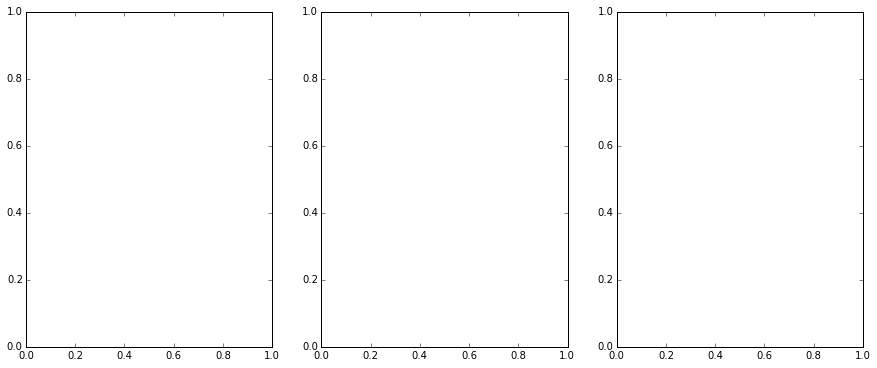

In [59]:

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

max_d = 10
k = 0.05

geo_str = ['REG', 'PRO', 'COM']

nod_f = list(df_node_ct.index.str.replace('nodes', 'nodes_meta'))
edg_f = list(df_node_ct.index.str.replace('nodes', 'edges'))
             
    
    
for max_d in [4, 7, 10, 20, 40]: 
    print max_d
    for j in range(len(nod_f)):
        print nod_f[j]`
        fig, axs = plt.subplots(1, 3, figsize = (15, 6))

        for i in range(len(geo_str)):

        #  
        #     print 'max degree: '+str(max_d)
            nodes = pd.read_csv(nod_f[j].replace('REG', geo_str[i]), index_col = 0)
            edges = pd.read_csv(edg_f[j].replace('REG', geo_str[i]), index_col = 0)

                ### Max degree = max_d
            df1 = edges.groupby('label_x').apply(lambda x: x.nlargest(max_d, 'weight_'+geo_str[i])).reset_index(drop = True)
            df2 = edges.groupby('label_y').apply(lambda x: x.nlargest(max_d, 'weight_'+geo_str[i])).reset_index(drop = True)
            edges = df1.merge(df2, on = ['label_x', 'label_y', 'weight_'+geo_str[i]]).reset_index(drop = True)


            G = nx.from_pandas_dataframe(edges, 'label_x', 'label_y', 'weight_'+geo_str[i])
            # nx.write_gexf(G,'networks/'+col_name+'.gexf')

        #     print 'nodes: '+str(len(G.nodes()))
        #     print 'edges: '+str(len(G.edges()))

            # Main component
        #         grcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        #         G0=grcc[0]

            # Subset of nodes
            nodes = nodes.set_index('node_name').loc[G.nodes()]

            #Perform Graph Drawing

            ax = axs[i]

            pos = nx.spring_layout(G, k=k)

            nx.draw(G, pos, node_size = 10 * nodes.node_size.values, alpha=.6, node_color= list(nodes.color.values), edgelist = [], ax = ax)
            nx.draw_networkx_edges(G, pos, edge_color='.7', alpha=.3,  ax = ax)
            #     plt.savefig('../DataViva/Figures/'+'_'+kw+'_'+name)
        plt.show()